<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/Practice_MNIST_CNN_Pytorch_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torchsummary import summary
import pdb

In [ ]:
transforms = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('root', 
                          download= True, 
                          train = True, 
                          transform = transforms)

trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size= 64, 
                                          shuffle= True)

valset = datasets.MNIST('root', 
                        download= True, 
                        train = False, 
                        transform= transforms)

valloader = torch.utils.data.DataLoader(valset, 
                                        batch_size=64,
                                        shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting root/MNIST/raw/train-images-idx3-ubyte.gz to root/MNIST/raw




Extracting root/MNIST/raw/train-labels-idx1-ubyte.gz to root/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting root/MNIST/raw/t10k-images-idx3-ubyte.gz to root/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting root/MNIST/raw/t10k-labels-idx1-ubyte.gz to root/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(len(trainloader.dataset))
print(len(trainloader))
print(len(valloader.dataset))
print(len(valloader))

60000
938
10000
157


In [ ]:
datiter = iter(trainloader)
images, labels = next(datiter)

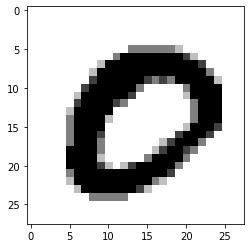

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r')

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 150, kernel_size = 3, padding = 1)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(150, 50, kernel_size=3, padding=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2)
    self.conv3 = nn.Conv2d(50, 50, kernel_size=3, padding=1)
    self.pool3 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(3*3*50, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = F.relu(self.conv3(x))
    x = self.pool3(x)
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    return F.log_softmax(x, dim = 1)

cnn = CNN()

In [ ]:
summary(cnn, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 150, 28, 28]           1,500
         MaxPool2d-2          [-1, 150, 14, 14]               0
            Conv2d-3           [-1, 50, 14, 14]          67,550
         MaxPool2d-4             [-1, 50, 7, 7]               0
            Conv2d-5             [-1, 50, 7, 7]          22,550
         MaxPool2d-6             [-1, 50, 3, 3]               0
            Linear-7                   [-1, 10]           4,510
Total params: 96,110
Trainable params: 96,110
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.24
Params size (MB): 0.37
Estimated Total Size (MB): 1.61
----------------------------------------------------------------


In [ ]:
print(len(trainloader))
print(iter(trainloader))
image, labels = next(iter(trainloader))
print(image.shape)
print(labels)

938
torch.Size([64, 1, 28, 28])
tensor([6, 5, 7, 6, 5, 0, 9, 1, 2, 3, 7, 4, 2, 8, 7, 3, 8, 3, 7, 2, 0, 2, 6, 1,
        6, 0, 1, 3, 5, 4, 5, 7, 8, 6, 1, 5, 5, 6, 6, 0, 7, 3, 9, 2, 0, 5, 1, 3,
        9, 9, 8, 3, 9, 2, 3, 2, 6, 5, 2, 1, 7, 1, 0, 4])


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr = 0.001, momentum=0.9)

In [ ]:
time0 = time()
for e in range(20):
  running_loss = 0.0
  for image, label in iter(trainloader):

    optimizer.zero_grad()

    outputs = cnn(image)
    loss = criterion(outputs, label)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f'Epoch {e} - Training loss: {running_loss/len(trainloader)}')
print(f'\nTraining Time (in minutes) = {(time() - time0)/ 60}')

Epoch 0 - Training loss: 1.0127905076627792
Epoch 1 - Training loss: 0.9940747145904916
Epoch 2 - Training loss: 0.9836503354344033
Epoch 3 - Training loss: 0.9758589178450835
Epoch 4 - Training loss: 0.9689809309521209
Epoch 5 - Training loss: 0.9647417893923168
Epoch 6 - Training loss: 0.960008258695033
Epoch 7 - Training loss: 0.9568352818107808
Epoch 8 - Training loss: 0.9547533441835375
Epoch 9 - Training loss: 0.9513134953182644
Epoch 10 - Training loss: 0.9494427963614718
Epoch 11 - Training loss: 0.9461168891458369
Epoch 12 - Training loss: 0.9452881220815532
Epoch 13 - Training loss: 0.9437766613990768
Epoch 14 - Training loss: 0.9415796710801786
Epoch 15 - Training loss: 0.9400304760505904
Epoch 16 - Training loss: 0.9392981277282304
Epoch 17 - Training loss: 0.9380438130166231
Epoch 18 - Training loss: 0.9353501291544453
Epoch 19 - Training loss: 0.9351510250809859

Training Time (in minutes) = 87.25073064963023
